In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [5]:
df = pd.read_csv('training_data.csv', na_values=['na'])

In [178]:
df.head(1)

,rowid,source_uuid,group,country,iso_3166_1,program,course_title,us_unit,student_unit,start_date,...,end_date,end_date_fixed,location,quantity,total_cost,source_url,row_status,date_first_seen,date_scraped,year
0,1,03221d24-92ea-4ccc-a6a2-bd88dbfcd9fb,2001_2002_Africa_fmtrpt.tsv,Angola,AGO,"DoS Africa Region, Angola, Africa Center for S...",Senior Leader Seminar,NaN,Ministry of Foreign Affairs MOD,1/29/01,...,2/9/01,2001-02-09,Libreville Gabon,2,9667.0,https://2009-2017.state.gov/documents/organiza...,Not checked against source; verify accuracy be...,2002-03,2019-07-17,2001.0


In [132]:
amount = df.groupby('country') ['total_cost'].sum().sort_values(ascending=False) / 1000000
cost = amount.reset_index()
cost.to_csv('per_country_cost.csv')

In [112]:
df['quantity'] = pd.to_numeric(df.quantity, errors='coerce').fillna(0).astype(int)

In [134]:
df.groupby('country') ['quantity'].sum().sort_values(ascending=False).head()

country
Colombia    70027
Uganda      45686
Nigeria     39833
Burundi     33840
Rwanda      31482
Name: quantity, dtype: int64

In [135]:
df['end_date_fixed'] = pd.to_datetime(df['end_date_fixed'])

In [139]:
df['year'] = df['end_date_fixed'].dt.year

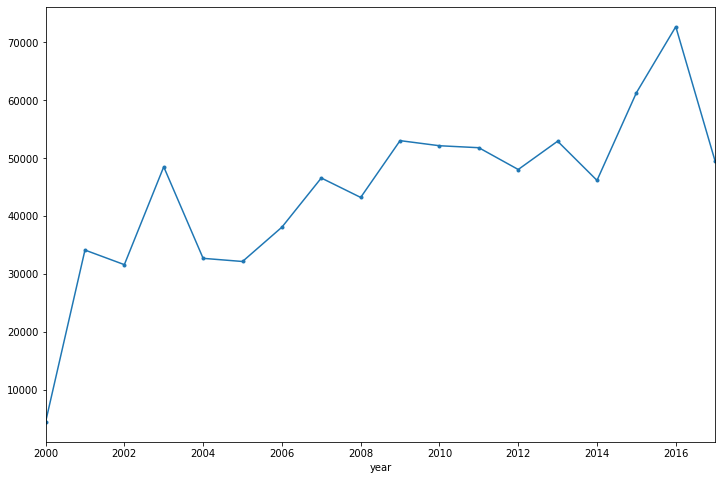

In [175]:
df.groupby('year')['quantity'].sum().plot(kind = 'line', style = '.-', figsize=(12, 8))

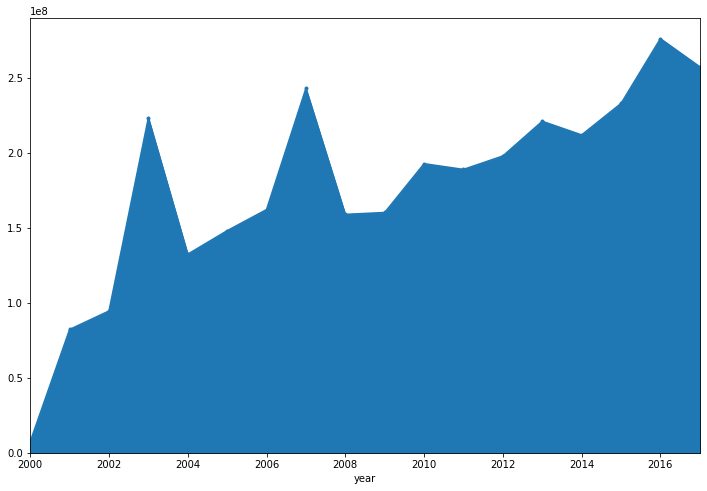

In [177]:
df.groupby('year')['total_cost'].sum().plot(kind = 'area', style = '.-', figsize = (12,8))

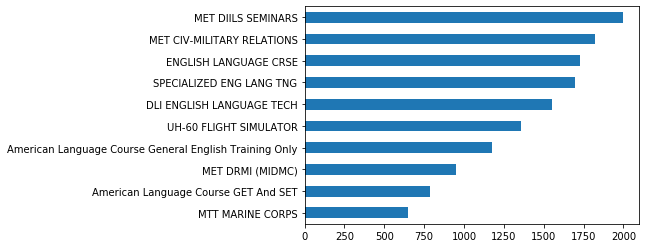

In [98]:
df.course_title.value_counts().sort_values(ascending=True).tail(10).plot(kind = 'barh')

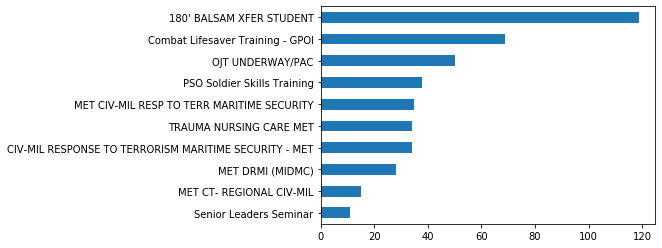

In [101]:
df[df['country'] == 'Nigeria'] ['course_title'].value_counts().sort_values(ascending=True).tail(10).plot(kind ='barh')

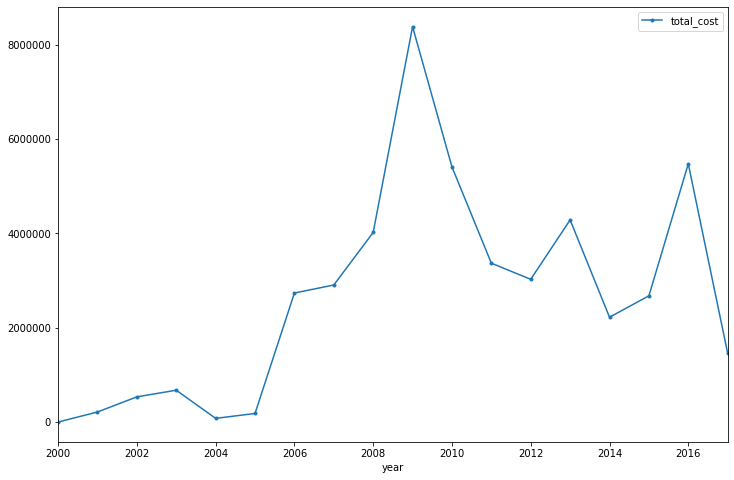

In [187]:
df[df['country'] == 'Nigeria'].groupby('year')['total_cost'].sum().reset_index().plot(x = 'year', y = 'total_cost', kind = 'line', style = '.-', figsize=(12, 8))

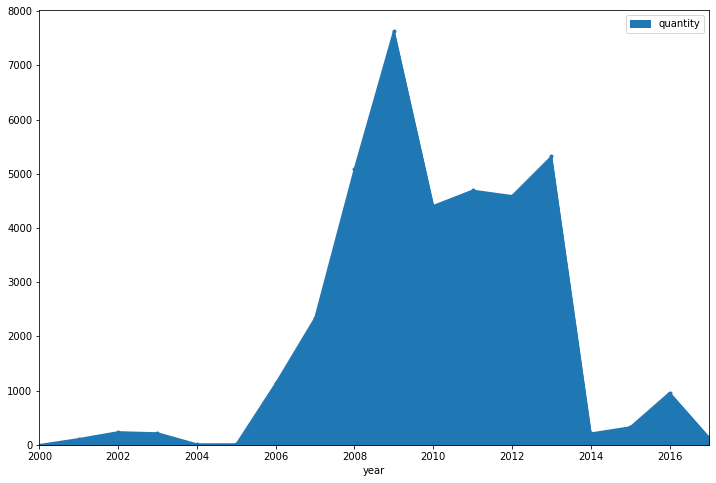

In [189]:
df[df['country'] == 'Nigeria'].groupby('year')['quantity'].sum().reset_index().plot(x = 'year', y = 'quantity', kind = 'area', style = '.-', figsize=(12, 8))

In [201]:
df[df['country'] == 'Nigeria'].groupby('year')['quantity'].sum().sort_values(ascending=False).head()

year
2009.0    7640
2013.0    5320
2008.0    5088
2011.0    4694
2012.0    4594
Name: quantity, dtype: int64

In [204]:
df[df['country'] == 'Nigeria'].groupby(['year', 'quantity'])['student_unit'].value_counts().sort_values(ascending=False).tail(20)




year    quantity  student_unit                                           
2013.0  1         DEFENCE HEADQUARTERS, ABUJA                                1
                  DEFENCE HEADQUARTERS                                       1
                  Cleen Foundation                                           1
                  Central Ammunition Depot, Kaduna                           1
                  CIVIL-MILITARY AFFAIRS, HQ NIGER DELTA                     1
                  Armed Forces                                               1
                  80 Bn & 322 BN                                             1
                  African Union/United Nations Hybrid Operation in Darfur    1
                  ARMED FORCES COMMAND AND STAFF COLLEGE, KADUNA             1
                  89 Bn & 322 BN                                             1
                  88 Bn & 322 BN                                             1
                  87 Bn & 322 BN                         

In [203]:
df[df['country'] == 'Nigeria'] ['program'].value_counts().head()

PKO - Fiscal Year 2013 Department of State Training               118
Africa Region, Nigeria, Foreign Military Financing (FMF), FY03    103
IMET-1 - Fiscal Year 2010 Department of State Training             83
IMET-1 - FY 2008 DoS Training                                      71
IMET-1 - FY 2007 DoS Training                                      62
Name: program, dtype: int64

In [87]:
df[df['country'] == 'Nigeria'] ['location'].value_counts().head()

ALAMEDA, CA 94501-5100           173
Jaji, Nigeria                    130
NIGERIA (IN COUNTRY TRAINING)     99
Jaji, NIGERIA                     64
Garmisch, GY                      43
Name: location, dtype: int64